In [1]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

## ML Pipeline

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
target             0
Length: 81, dtype: int64
0
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'target'],
      dtype='object')

Train Mean Absolute Error: 12808.58
Test Mean Absolute Error: 15080.96

Train Mean Squared Error: 321832743.62
Test Mean Squared Error: 415775912.

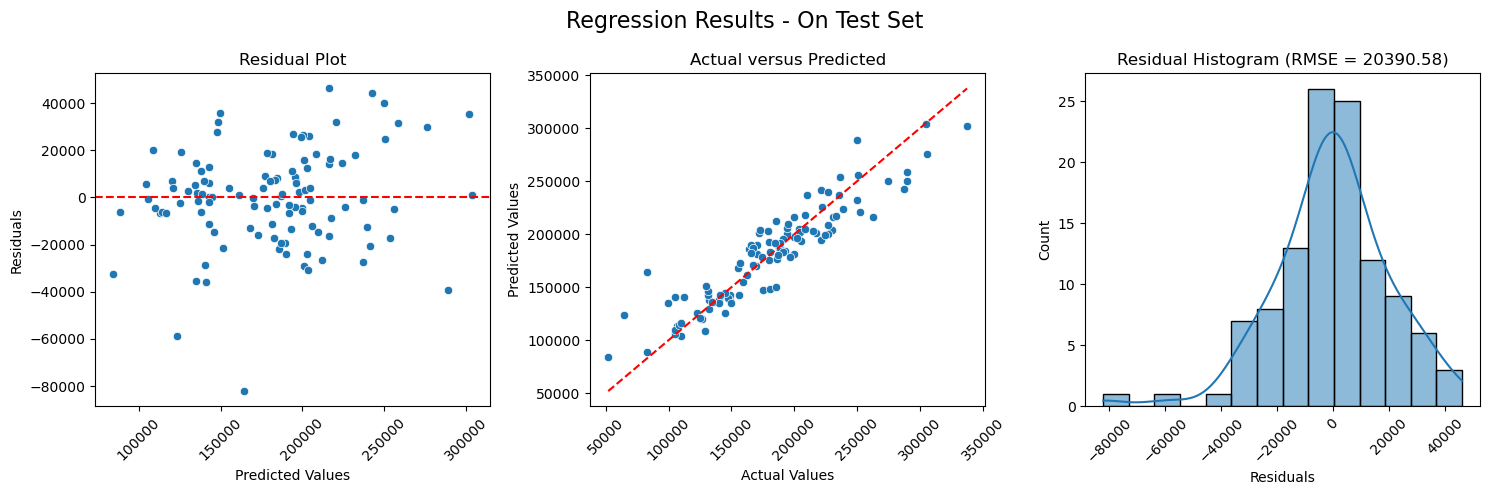

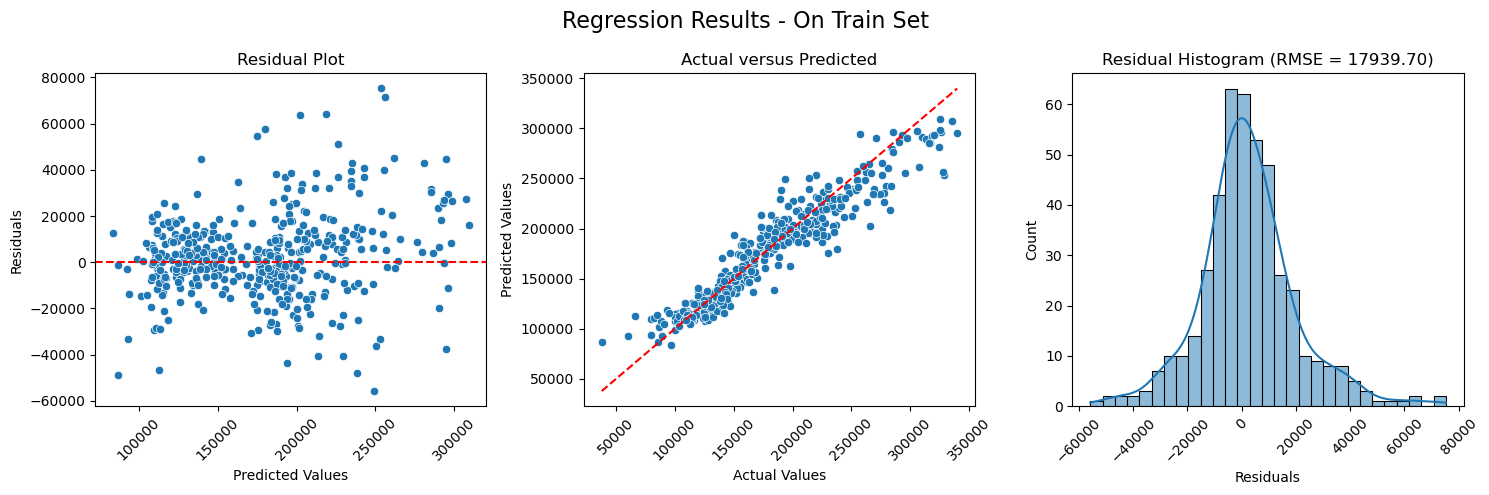

In [100]:
## load original data 
house_price_df=load_original_data()

## clean the data
house_price_df=clean_data(house_price_df)

## get only the Numerical features 
df=get_numerical_features(house_price_df)

## (experimental)create newly engineered features
#df=engineer_new_features(df)

# (experimental) Select the features to use in the model MANUALLY
#selected_features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
#'1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',"target"]

# (experimental)Select the desired features from the DataFrame
#df = select_features(df, selected_features)

## (experimental) encode categorical cols and using the encoded categrocials for the modeling. 
# It also drops the original categorical cols
#df=encode_categorical_cols(house_price_df)

# Split the dataset into X and y
X, y = split_X_y(df, "target")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = split_data(X, y)

## (experimental) scaling the features  
X_train, X_test=scale_features(X_train, X_test)


## fit Linear regression model
#model=build_linear_regression_model(X_train, y_train)

##(experimental) fitting KNN regressor
model = knn_regression(X_train, y_train, X_test, y_test, n_neighbors=5)

# make predictions using linear regression
y_train_pred, y_test_pred= predict_regression_model(model, X_train, y_train, X_test)

## report error metrics
report_regression_metrics(y_train, y_test, y_train_pred, y_test_pred)

# Plot the regression results
plot_regression_results(y_test, y_test_pred,"On Test Set")
plot_regression_results(y_train, y_train_pred,"On Train Set")

##(experimental) plot linear regression feature importances ONÖY works for LINEAR REGRESSION
#plot_feature_importances(model, X_train)

## Loading Data

In [13]:
def load_original_data():
    # Load the  Housing dataset
    housing = fetch_openml(name="house_prices", as_frame=True)

    # Convert to Pandas dataframe
    house_price_df = pd.DataFrame(housing.data, columns=housing.feature_names)
    house_price_df['target'] = housing.target
    return house_price_df

In [14]:
house_price_df=load_original_data()
house_price_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal,142125.0


### Correlation heatmap

In [5]:
def plot_correlation_heatmap(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.8, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('Correlation Heatmap')
    plt.show()

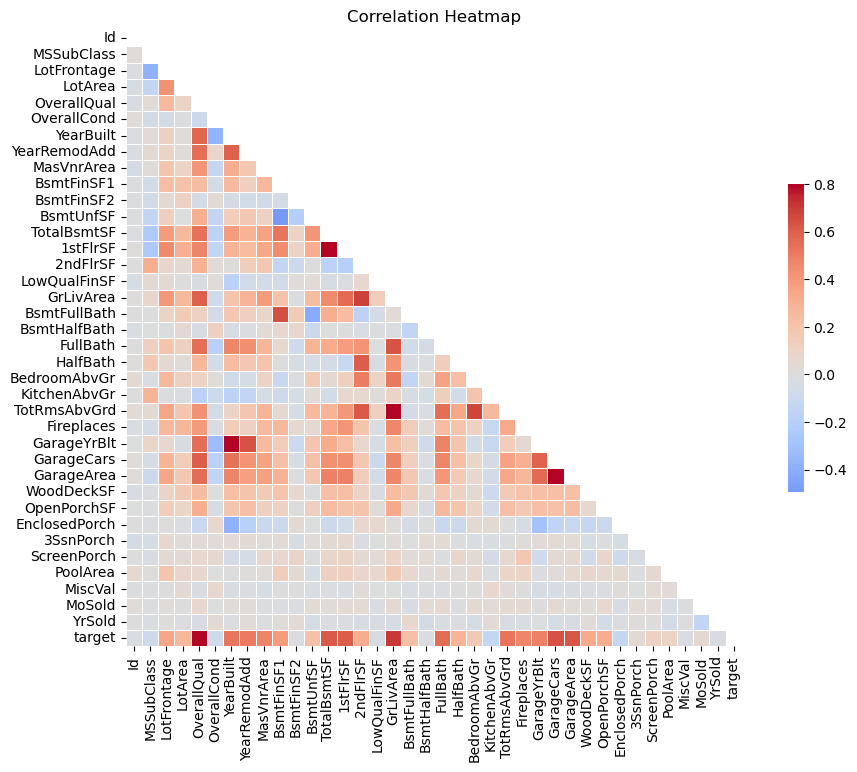

In [6]:
plot_correlation_heatmap(house_price_df)

## Data Cleaning

To perform data cleaning, we start by checking for missing values using the .isnull().sum() method. In this dataset, there are no missing values, so we move on to checking for duplicates using the .duplicated().sum() method. We find that there are some duplicates in the data, so we drop them using the .drop_duplicates() method.

Next, we impute any remaining missing values using the median of each column with the .fillna() method. We then check for outliers using the .describe() method, and find that there are some extreme values in the data. To remove outliers, we use the interquartile range (IQR) method. We calculate the first and third quartiles of each column using the .quantile() method, and then calculate the IQR as the difference between the third and first quartiles. We then remove any rows where any value in the row is less than Q1 - 1.5IQR or greater than Q3 + 1.5IQR, using the ~ operator to invert the boolean mask generated by the condition, and the .any() method to apply it to each row.

In [16]:
def clean_data(df):
    # Check for missing values
    print(df.isnull().sum())

    # Check for duplicates
    print(df.duplicated().sum())

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Impute missing values
    df.fillna(house_price_df.median(), inplace=True)

    # Check for outliers
    #print(df.describe())

    # Remove outliers
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

In [17]:
house_price_df=clean_data(house_price_df)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
target             0
Length: 81, dtype: int64
0


## Feature selection

This function uses the select_dtypes() method in pandas to extract all columns of the data frame with numerical data types (float and int). You can then use this function to extract the numerical features of a dataset and feed them into a machine learning model.

In [18]:
def get_numerical_features(df):
    """
    Returns a DataFrame containing only the numerical features of the input DataFrame.
    """
    print(df.select_dtypes(include=[float, int]).columns)
    return df.select_dtypes(include=[float, int])


##function to select features manually by input list in a pandas DataFrame
def select_features(df, feature_list):
    """
    Returns a DataFrame containing only the selected features from the input DataFrame.
    """
    return df[feature_list]


In [19]:
# Select the features to use in the model
selected_features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']


## get only the Numerical features 
df=get_numerical_features(house_price_df)

# Select the desired features from the DataFrame
#df = select_features(df, selected_features)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'target'],
      dtype='object')


## X Y split 

When working with supervised learning problems, it is common to split the data into two parts: the features (X) and the target variable (y). This process is known as Xy split.

The features (X) are the input variables that we use to make predictions. In the context of machine learning, features can be any measurable characteristic of the data that we use to train our model.

The target variable (y) is the variable we want to predict using our model.

By splitting the data into X and y, we can then train a machine learning model using the features (X) and the corresponding target variable (y). During training, the model learns the relationship between the features and the target variable, and we can then use this model to make predictions on new, unseen data.

we define a function split_X_y() that takes as input a dataframe and the name of the target column and performs the following operations:

Drops the target column from the dataframe using the drop() method of the Pandas dataframe.
Assigns the target variable to a separate variable using the target column name.

In [22]:
def split_X_y(df, target_col):
    # Split dataframe into X and y
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    return X, y

In [23]:
# Split the dataset into X and y
X, y = split_X_y(df, "target")

## Train Test split

Train-test split is a common method of splitting a dataset into two parts, where one part is used for training a machine learning model and the other part is used for testing the model. This method is used to evaluate how well the model generalizes to new, unseen data.

The process involves randomly dividing the dataset into two subsets: a training set and a testing set. Typically, the training set is much larger than the testing set, with a common split being 80% for training and 20% for testing.

The training set is used to train the model, while the testing set is used to evaluate the model's performance on new, unseen data. The goal is to build a model that performs well on both the training set and the testing set, which indicates that the model has learned to generalize well to new data.

It is important to note that the testing set should be completely independent of the training set, meaning that none of the data in the testing set should have been used during the training phase. This ensures that the model's performance on the testing set is a true reflection of its ability to generalize to new data.

In [24]:
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split the data into training and testing sets using sklearn's train_test_split function.
    
    Parameters:
    X (pandas DataFrame): The feature matrix
    y (pandas Series): The target variable
    test_size (float): The proportion of data to include in the test set
    random_state (int): The random seed to use for reproducibility
    
    Returns:
    X_train (pandas DataFrame): The feature matrix for the training set
    X_test (pandas Data
    Frame): The feature matrix for the testing set
    y_train (pandas Series): The target variable for the training set
    y_test (pandas Series): The target variable for the testing set
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

In [25]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = split_data(X, y)

## Model fitting

The function below takes two arguments: the training data (X_train) and the target variable (y_train). It first creates an instance of LinearRegression, which represents a simple linear regression model. It then fits the model to the training data by calling the fit method with X_train and y_train as arguments.

Finally, the function returns the trained model object (lr), which can be used to make predictions on new data using the predict method.

In [26]:
def build_linear_regression_model(X_train, y_train):
    # Create a linear regression object
    lr = LinearRegression()
    
    # Train the model using the training data
    lr.fit(X_train, y_train)
    
    # Return the trained model
    return lr

In [29]:
## fit the model
lr=build_linear_regression_model(X_train, y_train)
lr.coef_
lr.intercept_

-1756529.5217035594

## Generate predictions

In [32]:
def predict_regression_model(model, X_train, y_train, X_test):
    
    # Make predictions on the training data
    y_train_pred = model.predict(X_train)
    
    # Make predictions on the test data
    y_test_pred = model.predict(X_test)
    
    # Return the predicted values for both sets
    return y_train_pred, y_test_pred


In [33]:
# make predictions using linear regression
y_train_pred, y_test_pred= predict_regression_model(lr, X_train, y_train, X_test)

## Model Evaluation 

The function below takes two arguments: the true target values (y_true) and the predicted values (y_pred). It uses scikit-learn's mean_absolute_error, mean_squared_error, and r2_score functions to calculate the MAE, MSE, RMSE, and R-squared value, respectively.

The function then prints out these metrics using print statements. These metrics can be used to evaluate the performance of a regression model on a given dataset, with lower values of MAE, MSE, and RMSE indicating better performance, and higher values of R-squared indicating better fit of the model to the data.

In [34]:
def report_regression_metrics(y_train, y_test, y_train_pred, y_test_pred):
    # Calculate mean absolute error (MAE) for train and test sets
    train_mae = round(mean_absolute_error(y_train, y_train_pred),2)
    test_mae = round(mean_absolute_error(y_test, y_test_pred),2)
    print('\nTrain Mean Absolute Error:', train_mae)
    print('Test Mean Absolute Error:', test_mae)
    
    # Calculate mean squared error (MSE) for train and test sets
    train_mse = round(mean_squared_error(y_train, y_train_pred),2)
    test_mse = round(mean_squared_error(y_test, y_test_pred),2)
    print('\nTrain Mean Squared Error:', train_mse)
    print('Test Mean Squared Error:', test_mse)
    
    # Calculate root mean squared error (RMSE) for train and test sets
    train_rmse = round(np.sqrt(train_mse),2)
    test_rmse = round(np.sqrt(test_mse),2)
    print('\nTrain Root Mean Squared Error:', train_rmse)
    print('Test Root Mean Squared Error:', test_rmse)
    
    # Calculate R-squared value for train and test sets
    train_r2 = round(r2_score(y_train, y_train_pred),2)
    test_r2 = round(r2_score(y_test, y_test_pred),2)
    print('\nTrain R-squared:', train_r2)
    print('Test R-squared:', test_r2)

In [35]:
## report error metrics
report_regression_metrics(y_train, y_test, y_train_pred, y_test_pred)


Train Mean Absolute Error: 13470.22
Test Mean Absolute Error: 12933.61

Train Mean Squared Error: 318505164.72
Test Mean Squared Error: 338229317.35

Train Root Mean Squared Error: 17846.71
Test Root Mean Squared Error: 18391.01

Train R-squared: 0.9
Test R-squared: 0.88


## Plotting regression results

The function below creates a figure with three subplots: a residual plot, an actual versus predicted plot, and a residual histogram. 
- The residual plot shows the residuals versus the predicted target values, with a red dashed line at zero. 
- The actual versus predicted plot shows the true target values versus the predicted target values, with a red dashed line representing a perfect match between the two. 
- The residual histogram shows the distribution of residuals, with a line indicating a normal distribution.

In [21]:
def plot_regression_results(y_test, y_pred,title="On Test Set"):
    """
    Create subplots of residual plots, actual versus predicted plots, and residual histograms for a regression model.
    
    Parameters:
    y_test (numpy array or pandas Series): The true target values
    y_pred (numpy array or pandas Series): The predicted target values
    
    Returns:
    None
    """
    residuals = y_test - y_pred
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("Regression Results - "+ title, fontsize=16)

    # Residual plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axs[0])
    axs[0].axhline(y=0, color='r', linestyle='--')
    axs[0].set_xlabel('Predicted Values')
    axs[0].set_ylabel('Residuals')
    axs[0].set_title('Residual Plot')
    
    # Actual versus predicted plot
    sns.scatterplot(x=y_test, y=y_pred, ax=axs[1])
    axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    axs[1].set_xlabel('Actual Values')
    axs[1].set_ylabel('Predicted Values')
    axs[1].set_title('Actual versus Predicted')
    
    # Residual histogram
    sns.histplot(x=residuals, ax=axs[2], kde=True)
    axs[2].set_xlabel('Residuals')
    axs[2].set_ylabel('Count')
    axs[2].set_title(f'Residual Histogram (RMSE = {rmse:.2f})')
    
    # Rotate x-axis tick labels in all subplots
    for ax in axs:
        ax.tick_params(axis='x', labelrotation=45)
        
    fig.tight_layout()

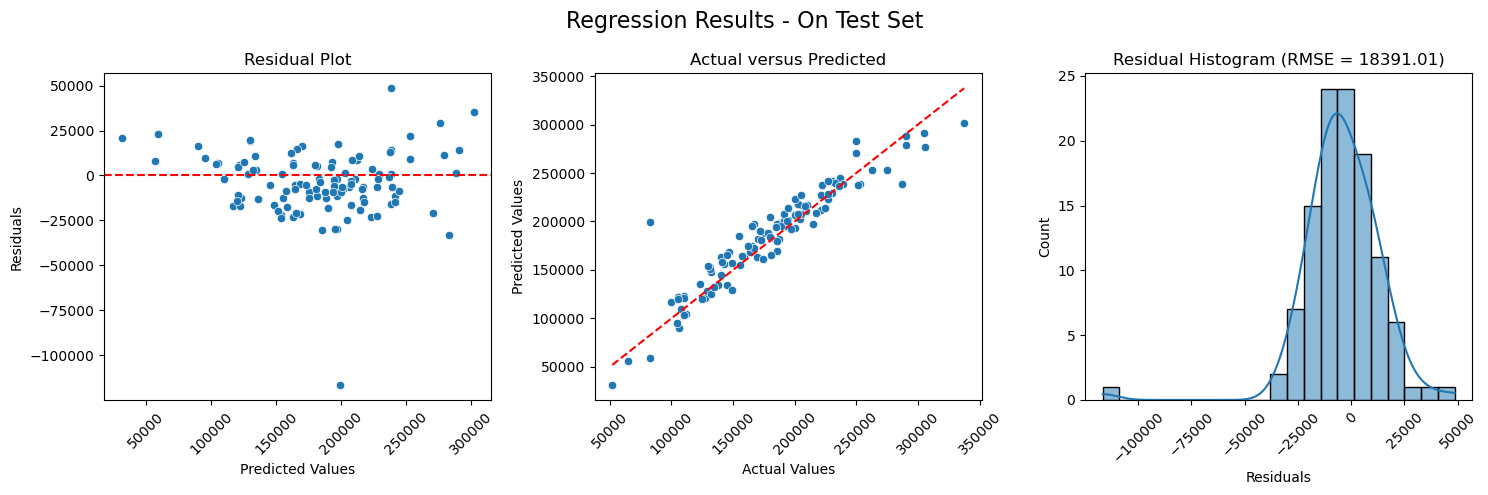

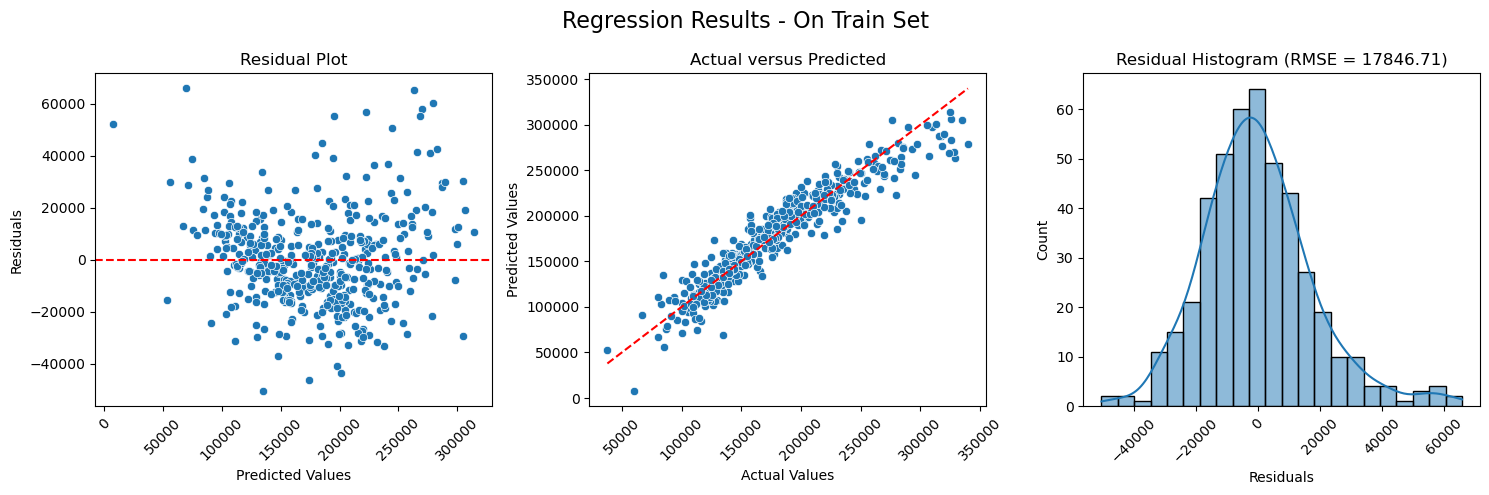

In [22]:
# Plot the regression results
plot_regression_results(y_test, y_test_pred,"On Test Set")
plot_regression_results(y_train, y_train_pred,"On Train Set")

## Model Paramters

In a linear regression model, coefficients represent the relationship between the independent variables (features) and the dependent variable (target). These coefficients are the values that the model calculates during training to minimize the difference between the predicted values and the actual values.

The coefficient indicates the slope of the line that best fits the data for a particular feature, meaning how much the target variable changes when the feature is changed by one unit while holding all other features constant. For example, a coefficient of 5 for a feature means that the target variable is expected to increase by 5 units for every one-unit increase in that feature.

The sign of the coefficient (positive or negative) indicates the direction of the relationship between the feature and the target. If the coefficient is positive, it means that an increase in the feature is associated with an increase in the target, and vice versa.

In summary, the coefficients in a linear regression model provide information about the direction and strength of the relationship between each feature and the target variable.

The function below takes in a trained linear regression model and a list of feature names, and returns a pandas DataFrame containing the coefficient values for each feature, as well as the intercept value.

In [23]:
def report_coef_train(model, feature_names):
    coef = pd.DataFrame(model.coef_, columns=['Coefficient'], index=feature_names)
    intercept = pd.DataFrame([model.intercept_], columns=['Intercept'], index=[''])
    return pd.concat([coef, intercept])


In [25]:
report_coef_train(lr, X_train.columns)

,Coefficient,Intercept
Id,-1.098061e+00,NaN
MSSubClass,-4.197568e+01,NaN
LotFrontage,5.906917e+01,NaN
LotArea,1.031962e+00,NaN
OverallQual,1.273956e+04,NaN
OverallCond,6.418011e+03,NaN
YearBuilt,3.101331e+02,NaN
YearRemodAdd,9.779232e+01,NaN
MasVnrArea,3.591539e+00,NaN
BsmtFinSF1,2.597517e+01,NaN


## Features Importances

In linear regression, feature importance is typically measured by the absolute value of the regression coefficients. The magnitude of the coefficient indicates the strength of the relationship between the corresponding feature and the target variable. The larger the coefficient (either positive or negative), the stronger the impact of the corresponding feature on the target variable.

However, the scale of the coefficients can be affected by the scale of the input variables. For example, if one feature is measured in thousands and another is measured in fractions, the coefficient of the former will be much larger even if its impact on the target variable is similar to that of the latter. Therefore, it is common practice to normalize the coefficients before comparing their magnitudes.

In practice, feature importances can be used to identify the most important predictors of the target variable and to guide feature selection or feature engineering efforts. However, it is important to note that feature importances are based solely on the linear relationship between the input variables and the target variable. Non-linear relationships, interactions between features, and other complex patterns in the data may not be captured by linear regression and may require more advanced modeling techniques.

The function below takes two arguments: the linear regression model (model) and the training data (X_train). It first gets the absolute value of the coefficients and normalizes them so they sum to 1. It then sorts the coefficients by importance and gets the corresponding feature names from the training data. Finally, it creates a horizontal bar chart of the feature importances with the y-axis ticks labeled by the feature names.

In [26]:

def plot_feature_importances(model, X_train):
    # Get absolute value of coefficients
    coefs = np.abs(model.coef_)
    
    # Normalize coefficients
    coefs /= np.sum(coefs)
    
    # Sort coefficients by importance
    sorted_idx = np.argsort(coefs)
    
    # Get feature names
    feature_names = X_train.columns.values
    
    plt.figure(figsize=(8, 5))
    # Plot horizontal bar chart of feature importances
    plt.barh(range(len(sorted_idx)), coefs[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
    # set the tick label font size and other parameters
    plt.tick_params(axis='both', which='major', labelsize=6, length=6, width=2, direction='out', pad=8)

    plt.xlabel('Normalized Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()


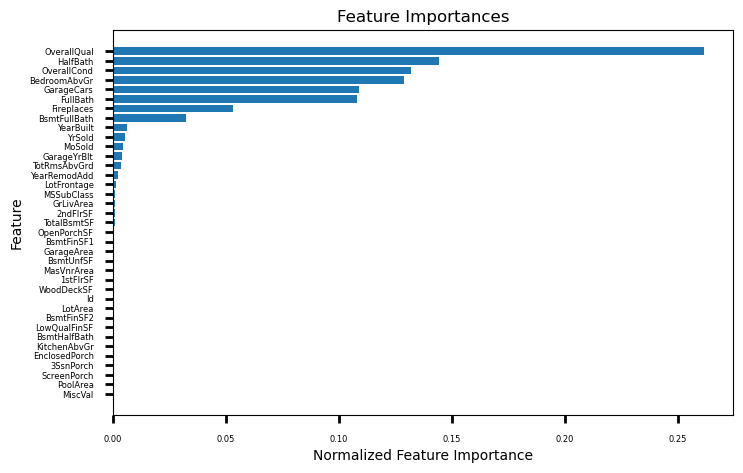

In [27]:
## plot linear regression feature importances
plot_feature_importances(lr, X_train)

## Feature Engineering

Feature engineering is the process of creating new features or variables from the existing data that can improve the performance of machine learning models. In other words, it's the process of transforming raw data into meaningful features that can help machine learning algorithms to better understand the underlying patterns in the data.

Feature engineering is a crucial step in the machine learning pipeline because the quality of features has a significant impact on the performance of the models. Poorly designed features can lead to models that are inaccurate, overfit, or fail to generalize to new data. On the other hand, well-designed features can help to improve model accuracy, reduce overfitting, and make the models more interpretable.

There are several techniques for feature engineering, such as:

- Scaling and normalization: transforming the data to have a specific range or distribution.
- Encoding categorical variables: converting categorical variables into numerical values that can be used in machine learning models.
- Feature extraction: creating new features by transforming the existing ones, such as using principal component analysis (PCA) to extract the most important features.

- Creating interaction terms: creating new features by combining two or more existing features, such as multiplying two features or taking the ratio between them.

The choice of feature engineering technique depends on the specific problem and dataset at hand. The goal is to create features that are informative, non-redundant, and relevant to the prediction task. Feature engineering can be a time-consuming process, but it's often a critical step in building accurate and effective machine learning models.#

### Feature Scaling

Scaling the features of a linear regression model using StandardScaler from scikit-learn. 

This function takes two arguments: the training data (X_train) and the test data (X_test). It first creates an instance of StandardScaler, which scales the data by subtracting the mean and dividing by the standard deviation. It then fits the scaler to the training data and applies it to both the training and test data. Finally, it returns the scaled training and test data.

It is important to note that the scaler is fit only to the training data and not the test data, as the test data should not be used to influence the scaling parameters. The same scaling parameters learned from the training data are applied to the test data to ensure that the test data is scaled consistently with the training data.

In [28]:
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

In [29]:
## scaling the features 
X_train_scaled,X_test_scaled=scale_features(X_train, X_test)

### Encoding Categorical variables
we encode the categorical variables in the dataset using one-hot encoding. We first identify the categorical columns in the dataset and apply the one-hot encoding using the OneHotEncoder() function from scikit-learn. We then convert the encoded features to a Pandas dataframe and drop the original categorical columns from the dataset.

In [30]:
# Encode categorical variables

def encode_categorical_cols(df):
    # Identify categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    print("Categorical Variables:", categorical_cols)
    
    # Apply one-hot encoding
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(df[categorical_cols])
    #print(X_encoded)
    # Convert encoded features to a Pandas dataframe
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names(categorical_cols),index=df.index)

    # Drop original categorical columns and merge with encoded features
    df_encoded=df.drop(categorical_cols, axis=1)
    df_encoded = pd.concat([df_encoded, X_encoded_df], axis=1)
    return df_encoded

In [31]:
## encode categorical cols and using the encoded categrocials for the modeling. 
# It also drops the original categorical cols
df=encode_categorical_cols(house_price_df)
df

Categorical Variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,7.0,20.0,75.0,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10,11.0,20.0,70.0,11200.0,5.0,5.0,1965.0,1965.0,0.0,906.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1449.0,50.0,70.0,11767.0,4.0,7.0,1910.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1451,1452.0,20.0,78.0,9262.0,8.0,5.0,2008.0,2009.0,194.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1453,1454.0,20.0,90.0,17217.0,5.0,5.0,2006.0,2006.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1454,1455.0,20.0,62.0,7500.0,7.0,5.0,2004.0,2005.0,0.0,410.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### engineering new caculated features

we perform feature engineering by creating four new features based on existing ones:

- TotalSF: Total square footage of the house by adding the square footage of the basement, first floor, and second floor.
- TotalBathrooms: Total number of bathrooms in the house by adding the number of full and half bathrooms on each floor, including the basement.
- TotalPorchSF: Total square footage of all porch areas by adding the square footage of the open, enclosed, 3-season, and screen porches.
- Age: Age of the house in years at the time of sale by subtracting the year the house was built from the year it was sold.


In [32]:
def engineer_new_features(df):
    # Perform feature engineering
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    df['Age'] = df['YrSold'] - df['YearBuilt']

    df = df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'YearBuilt', 'YrSold'], axis=1)
    return df

In [33]:
## (experimental)create newly engineered features
df=engineer_new_features(house_price_df)

## Feature Selection

### Feature Selection using RFE 

Recursive Feature Elimination (RFE) is a feature selection technique used to select the most important features from a given set of features. The goal of feature selection is to reduce the number of input features, while maintaining the predictive performance of the model. RFE does this by recursively removing features from the input feature set and ranking them based on their importance.

The RFE algorithm works as follows:

- First, a machine learning model is trained on the full set of input features. The importance of each feature is then calculated based on the model's coefficients or feature importance scores.

- The least important feature is then removed from the feature set, and the model is trained again on the reduced set of features.

- The importance of each feature is again calculated, and the least important feature is removed. This process is repeated until a predetermined number of features remain.

- The remaining features are considered the most important features for the given problem, as they have the greatest impact on the model's performance.

RFE can be used with any machine learning algorithm, but it is often used with linear models due to their interpretability and ease of feature importance calculation. The number of features to select can be set manually, or determined through cross-validation or other methods.

One advantage of RFE is that it can help to reduce the risk of overfitting, by removing irrelevant features that may introduce noise into the model. It can also help to increase model interpretability, by identifying the most important features for the given problem.

One drawback of RFE is that it can be computationally expensive, as it requires training multiple models on different subsets of features. It may also be less effective for problems with a large number of features, as the number of possible subsets to evaluate can become prohibitively large.

To perform feature selection with RFE, we create a linear regression model and instantiate the RFE object with n_features_to_select=5, indicating that we want to select the top 5 features. We then fit the RFE object on the training set using the .fit() method.

To see which features were selected, we print the selected features by iterating through the boolean mask generated by rfe.support_ and printing the column names where the mask is True. We also print the feature ranking using the .ranking_ attribute of the RFE object, where 1 indicates the most important feature and higher values indicate less important features.

Note that in this example, we only use the train data to perform feature selection. We can then use these selected features to train a model on the train data, and evaluate its performance on the test data to see how well it generalizes to new data.

In [34]:
from sklearn.feature_selection import RFE

# Feature selection with RFE
model=LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Print the selected features and their ranking
print("Selected Features:")
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        print(X.columns[i])
        
print("Feature Ranking:")
print(rfe.ranking_)

Selected Features:
OverallQual
BsmtFullBath
FullBath
TotRmsAbvGrd
GarageCars
Feature Ranking:
[23 11  9 24  1  4  8 16 22 18 26 19 14 21 15 25 12  1 27  1  2  7 28  1
  3 10  1 17 20 13 32 29 30 31 33  5  6]


### Feature Selection using P-Value

To perform feature selection using p-value on the OpenML house price dataset, we can use the statsmodels library. The basic steps involved in this process are:

- Fit a multiple linear regression model on the entire dataset
- Calculate p-values for each feature using the statsmodels library
- Select the features with p-values less than a specified threshold (e.g. 0.05) as significant predictors
- Fit the multiple linear regression model using only the significant predictors

In [49]:
import statsmodels.api as sm

def feature_selection_pvalue_train(X_train, y_train, cols):
    # Fit the OLS model
    
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()

    ## report model summary
    print(model.summary())
    
    # Get the p-values
    pvalues = model.pvalues[1:]

    print(pvalues.index)
    # Combine the p-values with the column names
    pvalues_df = pd.DataFrame({'feature': pvalues.index, 'pvalue': pvalues})

    # Filter out the columns with p-value > 0.05
    selected_features = list(pvalues_df[pvalues_df['pvalue'] < 0.05]['feature'])

    return selected_features


In [52]:
# Select significant features using p-value
significant_features = feature_selection_pvalue_train(X_train, y_train,X_train.columns)
print("\n\nThe selected signficant features are: ")
print(significant_features)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     140.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):          1.27e-188
Time:                        23:39:32   Log-Likelihood:                -4987.8
No. Observations:                 445   AIC:                         1.003e+04
Df Residuals:                     418   BIC:                         1.014e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -1.0981      2.158     -0.509

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'HalfBath',
 'BedroomAbvGr',
 'GarageArea']

#### Fit OLS model on significant features only

In [53]:
# Fit OLS model on significant features only
ols_model_sig = sm.OLS(y_train, sm.add_constant(X_train[significant_features]))

# Return the model summary
ols_model_sig.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     329.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):          1.72e-202
Time:                        23:40:46   Log-Likelihood:                -4996.6
No. Observations:                 445   AIC:                         1.002e+04
Df Residuals:                     433   BIC:                         1.007e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.017e+06   1.14e+05     -8.898      0.000   -1.24e+06   -7.93e+05
LotArea          1.1763      0.398      2.956      0.003       0.394       1.958
OverallQual    1.33e+04   1213.684     10.955      0.000    1.09e+04    1.57e+04
OverallCond   7294.7987   1508.078      4.837      0.000    4330.735    1.03e+04
YearBuilt      476.5157     57.250      8.323      0.000     363.993     589.038
BsmtFinSF1      27.2543      2.904      9.385      0.000      21.546      32.962
BsmtUnfSF        7.8957      2.839      2.781      0.006       2.315      13.476
TotalBsmtSF     35.1501      5.246      6.701      0.000      24.840      45.461
2ndFlrSF        29.5624      7.700      3.839      0.000      14.428      44.697
GrLivArea       40.0254      7.697      5.200      0.000      24.898      55.153
HalfBath     -4881.4354   3038.870     -1.606      0.109   -1.09e+04    1091.335
BedroomAbvGr -6361.6656   1887.703     -3.370      0.001   -1.01e+04   -2651.465
GarageArea      38.4298      6.318      6.082      0.000      26.012      50.848
==============================================================================
Omnibus:                       39.755   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.598
Skew:                           0.644   Prob(JB):                     5.13e-13
Kurtosis:                       4.180   Cond. No.                     5.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## KNN Regressor

K-Nearest Neighbors (KNN) regressor is a non-parametric regression algorithm that makes predictions based on the distances between an input point and its k nearest neighbors in the training data.

The basic idea behind the KNN regressor is that similar inputs have similar outputs. To make a prediction for a new input, the algorithm first finds the k training inputs that are closest to the new input in terms of some distance metric (usually Euclidean distance). Then, it computes the average (or weighted average) of the target values for these k training inputs, and uses this as the predicted target value for the new input.

Here's a step-by-step overview of how the KNN regressor works:

Load the training data, which consists of input-output pairs.
Choose a value for k, the number of nearest neighbors to consider.
For each new input, compute the distance to each input in the training data.
Select the k training inputs with the smallest distances to the new input.
Compute the average (or weighted average) of the target values for these k training inputs.
Use this as the predicted target value for the new input.
One of the main advantages of the KNN regressor is that it is a very simple algorithm that requires minimal assumptions about the data. However, it can be computationally expensive for large datasets and high-dimensional input spaces, since it requires computing the distances between the new input and all training inputs. Additionally, the choice of k can have a big impact on the accuracy of the algorithm, and finding the optimal value for k can require some trial and error.

In the example below, we first load the California Housing dataset using fetch_california_housing(). We then split the data into training and testing sets using train_test_split(), with a test size of 0.2 and a random state of 42 for reproducibility.

Next, we scale the features using StandardScaler() to ensure that each feature has a mean of 0 and a variance of 1. This is important for KNN, as it calculates distances between data points based on the feature values.

We then create a KNN regressor with n_neighbors=5 and fit it to the scaled training data using fit(). We use the predict() method to generate predictions for the test input values (X_test_scaled), and calculate the mean squared error on the test set using mean_squared_error() to evaluate the performance of the model.

Note that in this example, we used the mean squared error as a metric to evaluate the performance of the KNN regressor, but other metrics can be used as well. Additionally, the optimal value of n_neighbors can be determined through hyperparameter tuning using techniques like cross-validation.

In [67]:
def knn_regression(X_train, y_train, X_test, y_test, n_neighbors=5):
    """
    Fits a KNN regression model on the input data and returns the test RMSE.
    """
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    return knn

In [69]:
## fitting KNN regressor
knn = knn_regression(X_train, y_train, X_test, y_test, n_neighbors=5)

This function below  takes in the training and test data as well as a list of k values to try. It then fits a KNN regressor on each value of k, computes the root mean squared error (RMSE) on both the training and test sets, and plots the results on a graph. The x-axis represents the number of neighbors (k), and the y-axis represents the RMSE. The train errors are plotted in blue, and the test errors are plotted in orange.

In [97]:
## plotting diffrent K values for KNN 
def knn_plot(X_train, y_train, X_test, y_test, k_values):
    train_r2_errors = []
    test_r2_errors = []
    
    train_rmse_errors = []
    test_rmse_errors = []
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        train_pred = knn.predict(X_train)
        train_rmse_error = np.sqrt(mean_squared_error(y_train, train_pred))
        train_rmse_errors.append(train_rmse_error)
        train_r2_error = r2_score(y_train, train_pred)
        train_r2_errors.append(train_r2_error)
        
        test_pred = knn.predict(X_test)
        test_rmse_error = np.sqrt(mean_squared_error(y_test, test_pred))
        test_rmse_errors.append(test_rmse_error)
        test_r2_error = r2_score(y_test, test_pred)
        test_r2_errors.append(test_r2_error)

    fig,ax=plt.subplots(1,2,figsize=(10, 5))
    # Plot the errors for each k
    ax[0].plot(k_values, train_rmse_errors, label='Train RMSE')
    ax[0].plot(k_values, test_rmse_errors, label='Test RMSE')  
    ax[0].set_xlabel('K')
    ax[0].set_ylabel('RMSE')
    ax[0].legend()
    
    ax[1].plot(k_values, train_r2_errors, label='Train R2')
    ax[1].plot(k_values, test_r2_errors, label='Test R2')  
    ax[1].set_xlabel('K')
    ax[1].set_ylabel('R2')
    ax[1].legend()
    
    plt.show()


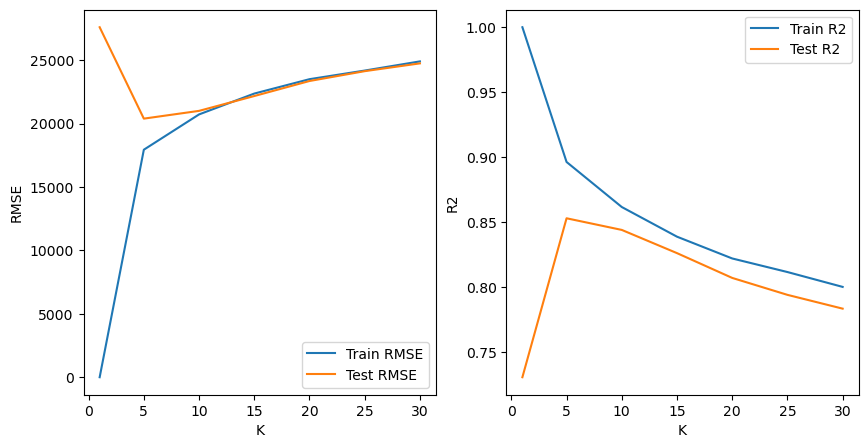

In [98]:
k_values = [1, 5, 10, 15, 20, 25, 30]
knn_plot(X_train, y_train, X_test, y_test, k_values)

## Evaluate regression models performance

To evaluate the performance of regression models, there are several metrics that can be used depending on the specific problem and the goals of the analysis. Some commonly used metrics include:

Mean Squared Error (MSE): This metric calculates the average squared difference between the predicted and actual values. A lower MSE indicates better performance, with a value of 0 indicating a perfect fit.

Root Mean Squared Error (RMSE): This is the square root of the MSE, and is a commonly used metric for evaluating regression models. Like the MSE, a lower RMSE indicates better performance.

R-squared (R2): This metric measures the proportion of variance in the target variable that is explained by the model. An R2 of 1 indicates a perfect fit, while a value of 0 indicates that the model provides no improvement over the mean prediction.

Mean Absolute Error (MAE): This metric calculates the average absolute difference between the predicted and actual values. Like MSE and RMSE, a lower MAE indicates better performance.

Coefficient of determination (Adjusted R-squared): This metric is an extension of R-squared that takes into account the number of features used in the model. It is typically used when comparing models with different numbers of features.

When evaluating regression models, it is important to consider the specific problem and the goals of the analysis. For example, if the goal is to make accurate predictions, then metrics such as MSE, RMSE, and MAE may be most appropriate. On the other hand, if the goal is to understand the underlying relationship between the input variables and the target variable, then metrics such as R-squared may be more useful.

This function takes in the input features (X) and target variable (y) of a dataset, as well as a dictionary of regression models to compare. The test_size and random_state parameters can be used to specify the proportion of the data to use for testing and the random seed to use for reproducibility, respectively.

The function splits the data into training and testing sets using train_test_split(), and then iterates over the models in the models dictionary. For each model, it fits the model to the training data using fit(), and then calculates the mean squared error on the test set using mean_squared_error(). The model name and mean squared error are then stored in a results dictionary.

The function returns the results dictionary, which contains the model names and their mean squared errors on the test set. Note that in this example, we're using the mean squared error as a metric to compare the performance of the models, but other metrics can be used as well.

In [78]:

def compare_regression_models(X, y, models, test_size=0.2, random_state=42):
    """
    Compares the performance of multiple regression models on a dataset.

    Parameters:
    X (array-like): The input features of the dataset.
    y (array-like): The target variable of the dataset.
    models (dict): A dictionary of regression models to compare, where the key is the model name and the value is the model object.
    test_size (float): The proportion of the data to use for testing (default is 0.2).
    random_state (int): The random seed to use for reproducibility (default is 42).

    Returns:
    A dictionary containing the model names and their r2 on the test set.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create a dictionary to store the model names and their mean squared errors
    results = {}
    
    # Iterate over the models and fit them to the training data
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Calculate the mean squared error on the test set
        y_pred = model.predict(X_test)
        #mse = mean_squared_error(y_test, y_pred)
        
        # Calculate R² score
        r2 = r2_score(y_test, y_pred)

        # Print the R² score
        #print('R² score:', r2)
        
        # Store the model name and mean squared error in the results dictionary
        results[name] = r2
    
    return results


In [79]:
models={"linear regression":LinearRegression(),"KNN Regressor":KNeighborsRegressor(5)}
compare_regression_models(X,y,models)

{'linear regression': 0.8804055709899141, 'KNN Regressor': 0.6089039565706791}